# KNN With Outlier Removal

## Import Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

## Import Dataset

In [55]:
path_to_file = './housing.csv'
df = pd.read_csv(path_to_file)

In [56]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


## Analysis of Data

In [57]:
df.shape

(20640, 9)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  int64  
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  int64  
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


## Inference 

- There is not any null value.
- There is not any column with object type.

## Outlier Removal

G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

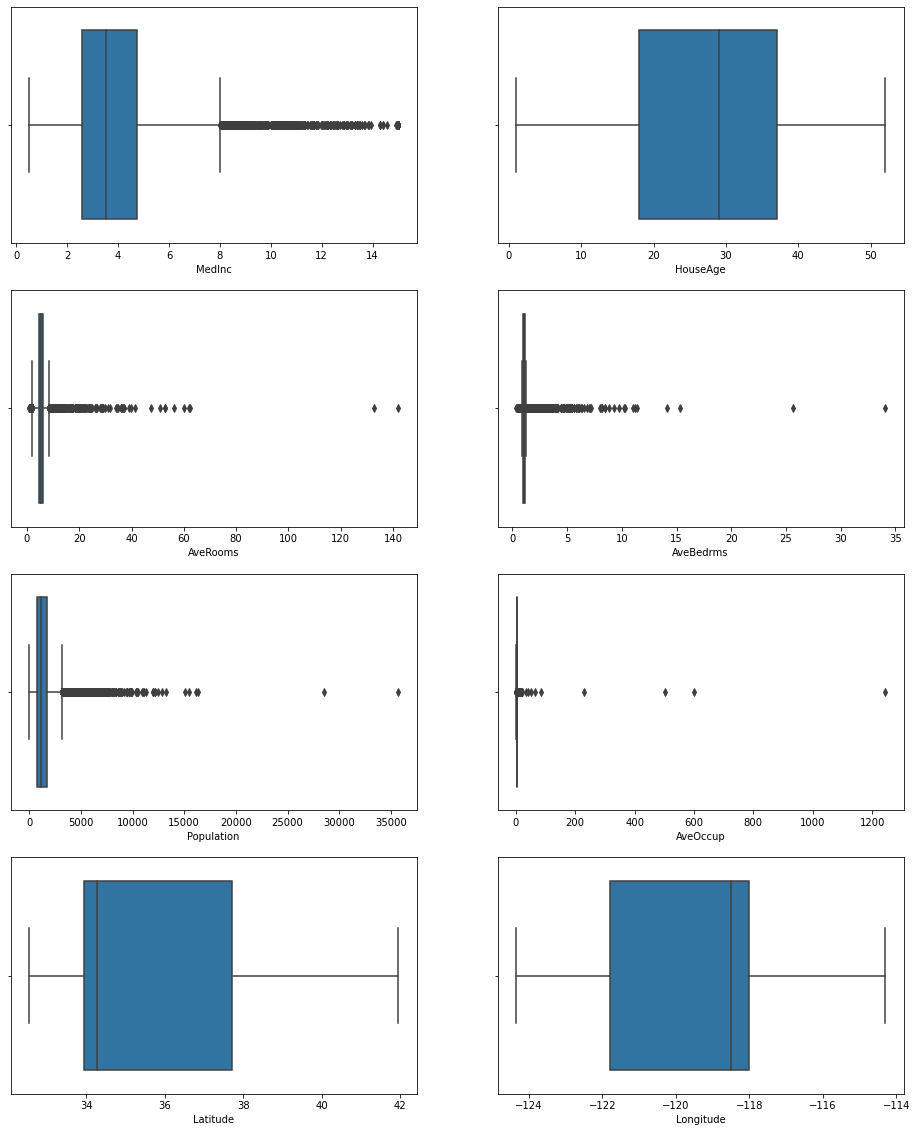

In [59]:
plt.figure(figsize=(16,20))
plt.subplot(4,2,1)
sns.boxplot(df['MedInc'])

plt.subplot(4,2,2)
sns.boxplot(df['HouseAge'])

plt.subplot(4,2,3)
sns.boxplot(df['AveRooms'])

plt.subplot(4,2,4)
sns.boxplot(df['AveBedrms'])

plt.subplot(4,2,5)
sns.boxplot(df['Population'])

plt.subplot(4,2,6)
sns.boxplot(df['AveOccup'])

plt.subplot(4,2,7)
sns.boxplot(df['Latitude'])

plt.subplot(4,2,8)
sns.boxplot(df['Longitude'])

plt.show()

G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AveRooms'>

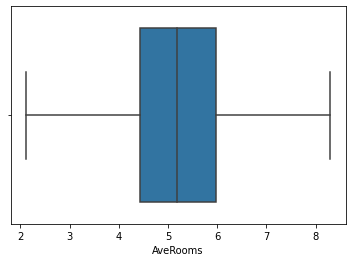

In [62]:
q1 = df["AveRooms"].quantile(0.25)
q3 = df["AveRooms"].quantile(0.75)
iqr = q3-q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

df = df[~((df['AveRooms'] >= high) | (df['AveRooms']<= low))]
sns.boxplot(df['AveRooms'])

G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AveBedrms'>

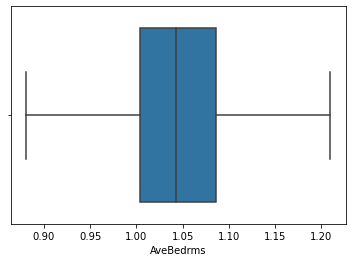

In [69]:
q1 = df["AveBedrms"].quantile(0.25)
q3 = df["AveBedrms"].quantile(0.75)
iqr = q3-q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

df = df[~((df['AveBedrms'] >= high) | (df['AveBedrms']<= low))]
sns.boxplot(df['AveBedrms'])

G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Population'>

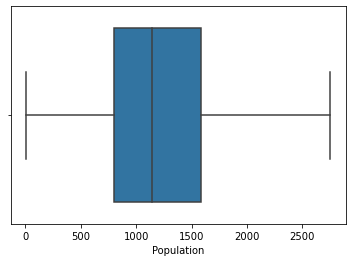

In [74]:
q1 = df["Population"].quantile(0.25)
q3 = df["Population"].quantile(0.75)
iqr = q3-q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

df = df[~((df['Population'] >= high) | (df['Population']<= low))]
sns.boxplot(df['Population'])

G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AveOccup'>

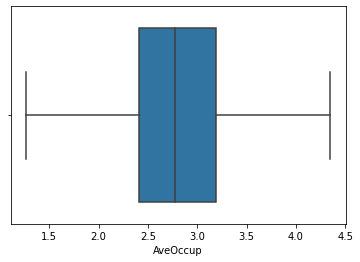

In [80]:
q1 = df["AveOccup"].quantile(0.25)
q3 = df["AveOccup"].quantile(0.75)
iqr = q3-q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

df = df[~((df['AveOccup'] >= high) | (df['AveOccup']<= low))]
sns.boxplot(df['AveOccup'])

## Train Test Split

In [81]:
y = df['MedHouseVal']
X = df.drop(['MedHouseVal'], axis = 1)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [83]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10726,11.0138,16,7.306991,1.060790,868,2.638298,33.64,-117.81
9906,3.4543,12,4.801042,1.046875,2293,2.388542,38.32,-122.28
11947,4.6327,34,5.552817,0.957746,880,3.098592,33.93,-117.44
9134,4.8667,14,6.925743,1.136139,1236,3.059406,34.51,-118.07
6347,2.0156,44,4.076923,1.153846,502,4.290598,34.06,-117.75
...,...,...,...,...,...,...,...,...
17184,4.5625,21,4.667954,1.193050,801,3.092664,37.50,-122.49
6813,3.2361,28,3.654054,0.956757,543,2.935135,34.10,-118.07
981,6.8132,4,6.359838,0.998652,1895,2.553908,37.68,-121.85
20020,1.5893,17,4.244337,1.066343,1912,3.093851,36.07,-119.04


In [84]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17095,3.9290,36,4.678241,1.002315,1117,2.585648,37.47,-122.24
13785,2.7028,29,4.828326,1.137339,1760,2.517883,34.03,-117.04
2880,1.3750,35,4.050847,1.031477,1041,2.520581,35.38,-118.97
8063,6.4468,43,5.948198,0.925676,1011,2.277027,33.83,-118.19
17648,6.0791,23,6.119910,1.015837,1180,2.669683,37.25,-121.89
...,...,...,...,...,...,...,...,...
8561,4.1818,22,4.426056,1.065141,1225,2.156690,33.93,-118.41
3895,3.2250,33,4.285714,1.072084,2118,2.775885,34.20,-118.53
19466,3.1625,16,5.992347,1.137755,1302,3.321429,37.68,-120.97
4689,2.3375,40,4.129252,1.013605,777,1.761905,34.07,-118.36


## Scaling Dataset 

In [85]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
X_train

array([[ 3.96529227, -1.12990404,  1.87674182, ..., -0.28905557,
        -0.95589406,  0.92501103],
       [-0.25974173, -1.45631436, -0.4062846 , ..., -0.71074472,
         1.23981314, -1.30709423],
       [ 0.39887062,  0.33894244,  0.27861465, ...,  0.48810571,
        -0.81983528,  1.10977142],
       ...,
       [ 1.61756056, -2.10913502,  1.01384548, ..., -0.43153909,
         0.93954549, -1.0923727 ],
       [-1.3020975 , -1.04830145, -0.91346664, ...,  0.48010197,
         0.18418468,  0.31080757],
       [-0.77141825, -1.45631436, -0.67251451, ...,  1.20624757,
         0.61112775, -0.20352541]])

In [87]:
col_names=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
scaled_df = pd.DataFrame(X_train, columns=col_names)
scaled_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.219600e+04,1.219600e+04,1.219600e+04,1.219600e+04,1.219600e+04,1.219600e+04,1.219600e+04,1.219600e+04
mean,-7.778662e-17,1.611990e-16,1.572300e-16,-1.648949e-16,5.990798e-17,5.897764e-16,1.197195e-15,8.471695e-15
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-1.890791e+00,-2.353943e+00,-2.836138e+00,-2.592897e+00,-2.144074e+00,-2.610157e+00,-1.471979e+00,-2.340754e+00
25%,-7.168692e-01,-8.034937e-01,-6.993266e-01,-6.817842e-01,-7.356713e-01,-6.824827e-01,-8.151436e-01,-1.107353e+00
50%,-1.590552e-01,9.413469e-02,-3.644057e-02,-3.713085e-02,-1.485411e-01,-6.414291e-02,-6.485889e-01,5.155421e-01
75%,5.152344e-01,6.653528e-01,6.482085e-01,6.530779e-01,6.266127e-01,6.301155e-01,9.630039e-01,8.051665e-01
max,6.193251e+00,1.807789e+00,2.778775e+00,2.617318e+00,2.726800e+00,2.596455e+00,2.942894e+00,2.542913e+00


## Training and Prediction For Regression

In [88]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [89]:
y_pred = regressor.predict(X_test)

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.4423957250368913
mse: 0.39249224151982975
rmse: 0.626492012335217


In [91]:
regressor.score(X_test, y_test)

0.6889819935603496

# Tuning the parameters of KNN Regression

## Best Value of K

In [92]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

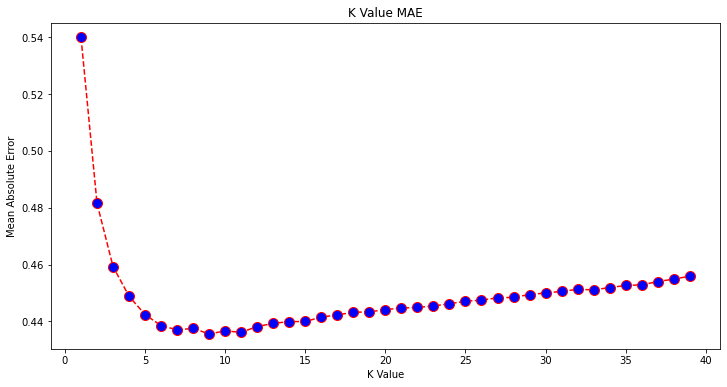

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [96]:
print(np.array(error).argmin())

8


## ***Inference***
- Looking at the plot, it seems the lowest MAE value is when ***K*** is ***8***. 

In [97]:
knn_reg8 = KNeighborsRegressor(n_neighbors=8)
knn_reg8.fit(X_train, y_train)
y_pred8 = knn_reg8.predict(X_test)
r2 = knn_reg8.score(X_test, y_test) 

mae8 = mean_absolute_error(y_test, y_pred8)
mse8 = mean_squared_error(y_test, y_pred8)
rmse8 = mean_squared_error(y_test, y_pred8, squared=False)
print(f'r2: {r2}, \nmae: {mae8} \nmse: {mse8} \nrmse: {rmse8}')

r2: 0.702721456111149, 
mae: 0.4375316087678307 
mse: 0.37515359120960284 
rmse: 0.6124978295550139


## ***Conclusion For Regression***
1. ***Observation before outlier removal***
- r2: 0.6887495617137436, 
- mae: 0.43631325936692505 
- mse: 0.4118522151025172 
- rmse: 0.6417571309323467


2. ***Observation after outlier removal and k value selection***
- r2: 0.702721456111149
- mae: 0.4375316087678307 
- mse: 0.37515359120960284 
- rmse: 0.6124978295550139 

## Training and Prediction For Classification 

In [98]:
df["MedHouseValCat"] = pd.qcut(df["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])

In [100]:
y = df['MedHouseValCat']
X = df.drop(['MedHouseVal'], axis = 1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [103]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
classifier = KNeighborsClassifier(5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [114]:
y_pred = classifier.predict(X_test)

G:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [115]:
acc =  classifier.score(X_test, y_test)
print(acc)

0.9795868175110674


G:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Tuning the parameters of KNN Classification

## Best Value of K

In [107]:
from sklearn.metrics import f1_score

f1s = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test) 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

G:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

G:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

G:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Text(0, 0.5, 'F1 Score')

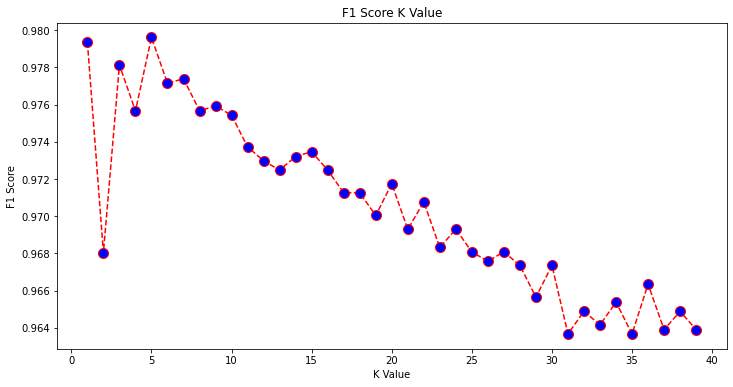

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

Text(0, 0.5, 'Mean Absolute Error')

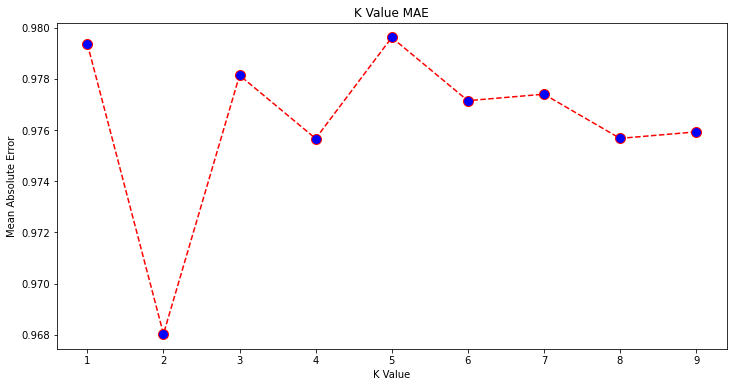

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), f1s[:9], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

## ***Inference***
- Looking at the plot, it seems the max f1s value is when ***K*** is ***5***. 

In [116]:
knn_class5 = KNeighborsRegressor(n_neighbors=5)
knn_class5.fit(X_train, y_train)
y_pred5 = knn_class5.predict(X_test)
acc =  classifier.score(X_test, y_test)
print(acc)

0.9795868175110674


G:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## ***Conclusion For Classification***
1. ***Observation before outlier removal***
- 0.7874031007751938

2. ***Observation after outlier removal and k value selection***
- acc: 0.9795868175110674